In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/kv_listings_with_accessibility_and_noise.csv")
print(df.head())

   Index                                            Address  Room Count  \
0      1  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           3   
1      2                         Tartu, Ülejõe, Staadioni 3           4   
2      3  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           2   
3      4                             Tartu, Ülejõe, Pikk 76           2   
4      5  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           4   

      Size      Price  Teenus_arv Teenustase  Tookoht_protsent  Kool_arv  \
0  64.3 m²  175 900 €         0.0          0          0.000000       0.0   
1    75 m²  235 000 €        37.0   Hea tase         58.684642       2.0   
2  50.8 m²  160 900 €         0.0          0          0.000000       0.0   
3  38.3 m²   89 000 €        33.0   Hea tase         58.533192       2.0   
4    83 m²  209 900 €         4.0          -          6.270224       0.0   

   Lasteaed_arv  Toidupood_arv  Toidukoht_arv  Parkimisnorm  \
0           0.0            0.

In [3]:
df = df.drop(columns=["Index", "Address"])

df["Teenustase"] = df["Teenustase"].replace("-", 0).replace("Baastase", 1).replace("Hea tase", 2)

df["Price"] = df["Price"].str.replace("€", "").str.replace(",", "").str.replace(" ","").astype(float)
df["Size"] = df["Size"].str.replace("m²", "").astype(float)
df["Room Count"] = df["Room Count"].astype(float)

Price                  1.000000
Size                   0.703764
Room Count             0.583971
Toidukoht_arv          0.258060
Teenus_arv             0.222864
MYRAKLASS              0.034021
Toidupood_arv          0.032825
Tookoht_protsent       0.021127
Teenustase             0.007312
Lasteaed_arv          -0.069224
Parkimis_koefitsent   -0.136577
Parkimisnorm          -0.136841
Kool_arv              -0.174672
Name: Price, dtype: float64


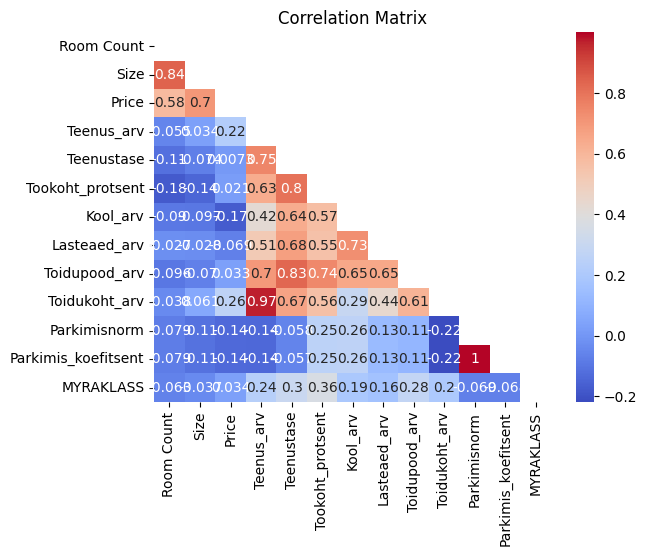

In [4]:
# Calculate correlation matrix
correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the correlation matrix
masked_corr = correlation_matrix.mask(mask)

# Extract correlations with the 'Price' column
price_correlation = correlation_matrix["Price"].sort_values(ascending=False)
print(price_correlation)

# Visualize correlations (optional)
sns.heatmap(masked_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()